In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense , Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [2]:
from keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

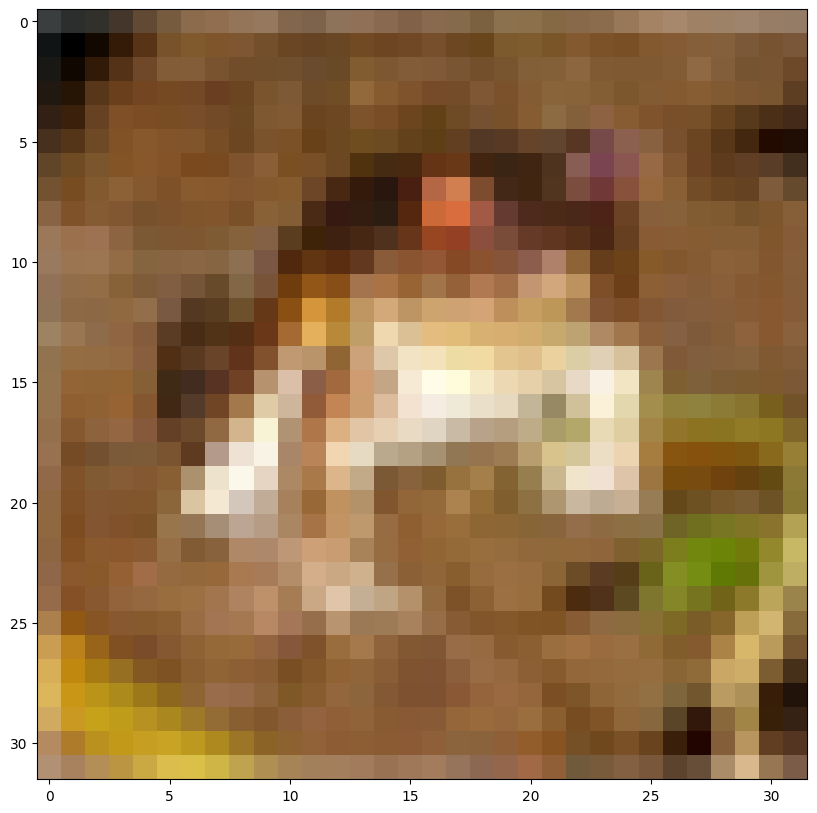

(32, 32, 3) (50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print(x_train[0].shape,x_train.shape,x_test.shape)
p
    x_train = x_train.astype('float32')/255
    y_train = x_train.astype('float32')/255

In [4]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [5]:

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_path='./data/model/new/cifar10.hdf5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history= model.fit(x_train,y_train,batch_size=1024,epochs=1000,verbose=1,
                   validation_split=0.2,callbacks=[checkpoint,early_stopping])


Epoch 1/1000
40/40 [==============================] - 43s 1s/step - loss: 10.1935 - accuracy: 0.1754 - val_loss: 1.9220 - val_accuracy: 0.3275
Epoch 2/1000
40/40 [==============================] - 39s 970ms/step - loss: 1.9068 - accuracy: 0.3159 - val_loss: 1.6980 - val_accuracy: 0.3974
Epoch 3/1000
40/40 [==============================] - 40s 1s/step - loss: 1.7656 - accuracy: 0.3623 - val_loss: 1.6956 - val_accuracy: 0.3996
Epoch 4/1000
40/40 [==============================] - 41s 1s/step - loss: 1.6527 - accuracy: 0.4072 - val_loss: 1.6871 - val_accuracy: 0.4253
Epoch 5/1000
40/40 [==============================] - 40s 990ms/step - loss: 1.6554 - accuracy: 0.4098 - val_loss: 1.5857 - val_accuracy: 0.4362
Epoch 6/1000
40/40 [==============================] - 40s 1s/step - loss: 1.5571 - accuracy: 0.4412 - val_loss: 1.4661 - val_accuracy: 0.4763
Epoch 7/1000
40/40 [==============================] - 40s 995ms/step - loss: 1.4628 - accuracy: 0.4764 - val_loss: 1.4112 - val_accuracy: 0.5

In [7]:
print('학습정확도:',history.history['accuracy'][-1])
print('검증정확도:',history.history['val_accuracy'][-1])
print('테스트정확도:',model.evaluate(x_test,y_test,verbose=0)[1])

학습정확도: 0.7646250128746033
검증정확도: 0.6226999759674072
테스트정확도: 0.6107000112533569


In [1]:
fig = plt.figure(figsize=(0.5,0.5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(x_train[3001], cmap='gray')
ax2.imshow(x_test[3001], cmap='gray')

plt.show()
model.predict(x_test[2999:3000]).argmax()

NameError: name 'plt' is not defined

In [30]:
data = {'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        'Description': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']}
df = pd.DataFrame(data)
df.set_index('Label', inplace=True)
df.columns = ['종류']
df

,종류
Label,
0,airplane
1,automobile
2,bird
3,cat
4,deer
5,dog
6,frog
7,horse
8,ship
